In [4]:
using DataFrames, CSV, Plots, Statistics, Flux

## Loading dataset and treating missings.
Since we have only 6 instances of missings, what represents 1.9% of our dataset, we delete them.

In [5]:
function openClevelandData(path::String)

    # Opening the DataFrame
    cleveland = DataFrame(CSV.File(path; header =  [:age, :sex, :cp, :trestbps, :chol, :fbs, :restecg, :thalach, :exang, :oldpeak, :slope, :ca, :thal, :target]))

    # Treating missings
    allowmissing!(cleveland)
    cleveland .= ifelse.(cleveland .=="?", missing, cleveland)
    dropmissing!(cleveland)

    # Converting some colunms to Int
    cleveland.age = convert.(Int, cleveland.age)
    cleveland.sex = convert.(Int, cleveland.sex)
    cleveland.cp = convert.(Int, cleveland.cp)
    cleveland.trestbps = convert.(Int, cleveland.trestbps)
    cleveland.chol = convert.(Int, cleveland.chol)
    cleveland.fbs = convert.(Int, cleveland.fbs)
    cleveland.restecg = convert.(Int, cleveland.restecg)
    cleveland.thalach = convert.(Int, cleveland.thalach)
    cleveland.exang = convert.(Int, cleveland.exang)
    cleveland.slope = convert.(Int, cleveland.slope)
    cleveland.target = convert.(Int, cleveland.target)
    
    
    #Converting ca and thal from String to Int
    cleveland.ca, cleveland.thal = parse.(Float64, cleveland.ca), parse.(Float64, cleveland.thal)
    cleveland.ca, cleveland.thal = convert.(Int, cleveland.ca), convert.(Int, cleveland.thal)

    cleveland

end

cleveland = openClevelandData("Data\\processed.cleveland.data")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64
1,63,1,1,145,233,1,2,150,0,2.3,3
2,67,1,4,160,286,0,2,108,1,1.5,2
3,67,1,4,120,229,0,2,129,1,2.6,2
4,37,1,3,130,250,0,0,187,0,3.5,3
5,41,0,2,130,204,0,2,172,0,1.4,1
6,56,1,2,120,236,0,0,178,0,0.8,1
7,62,0,4,140,268,0,2,160,0,3.6,3
8,57,0,4,120,354,0,0,163,1,0.6,1
9,63,1,4,130,254,0,2,147,0,1.4,2


## Balancing of the dataset
It's clear that our dataset is imbalanced, bacause we have 4 categories and only one represents more than 50% of the data.

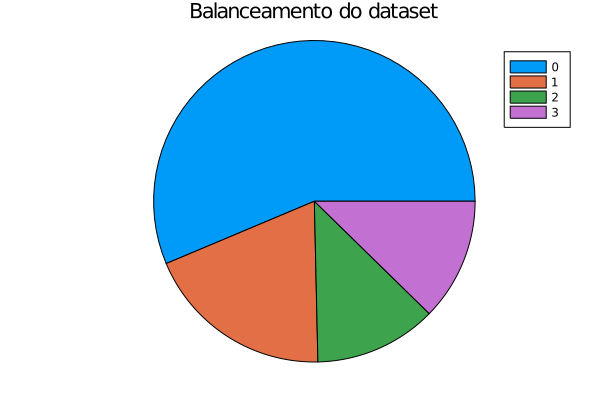

In [6]:
t0 = (length(filter(row -> row == 0, cleveland.target))) / length(cleveland.target)
t1 = (length(filter(row -> row == 1, cleveland.target))) / length(cleveland.target)
t2 = (length(filter(row -> row == 2, cleveland.target))) / length(cleveland.target)
t3 = (length(filter(row -> row == 3, cleveland.target))) / length(cleveland.target)
legend = ["0", "1", "2", "3"]
categories = [t0, t1, t2, t3] 
pie(legend, categories, title = "Balanceamento do dataset")

## Plotting categorical attributes

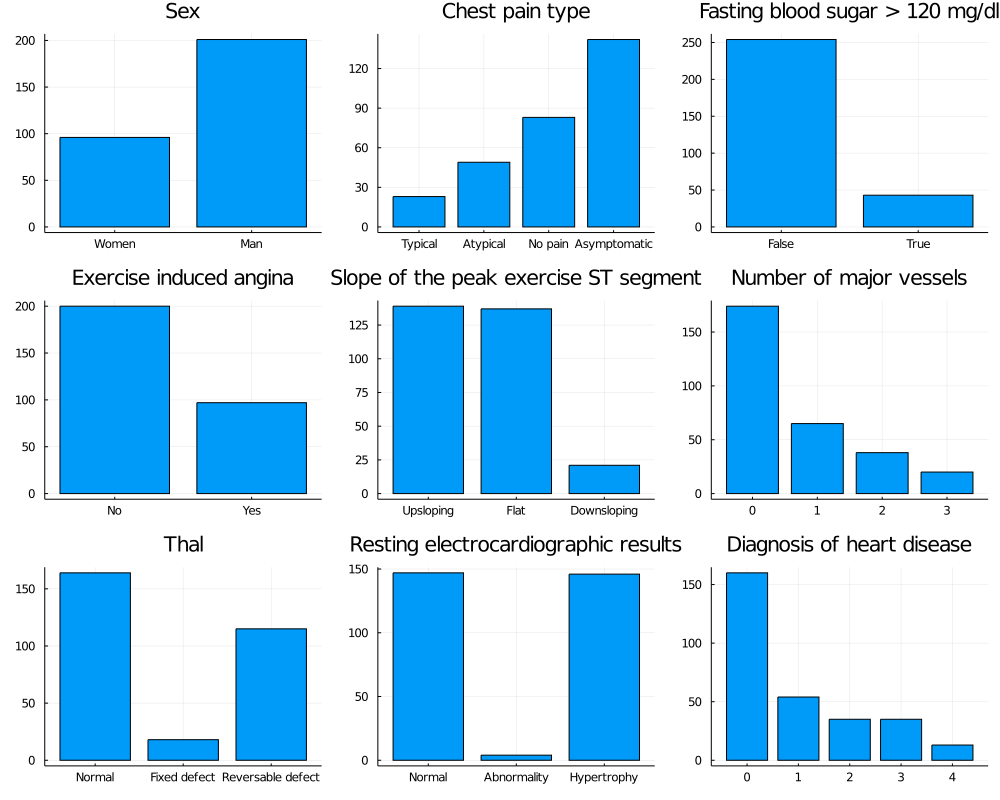

In [6]:
function plotCategorical(array::Array{<:Number, 1}, types::Array{<:Number, 1}, labels::Array{<:String, 1}, title::String)
    numberInTypes = zeros(length(types))

    for i = 1 : length(numberInTypes)
        numberInTypes[i] = length(filter(row -> row == types[i], array))
    end
    
    p = bar(labels, numberInTypes, title = title, legend = false)
    
    p
end

pSex = plotCategorical(cleveland.sex, [0, 1], ["Women", "Man"], "Sex")
pCp = plotCategorical(cleveland.cp, [1, 2, 3, 4], ["Typical", "Atypical", "No pain", "Asymptomatic"], "Chest pain type")
pFbs = plotCategorical(cleveland.fbs, [0, 1], ["False", "True"], "Fasting blood sugar > 120 mg/dl")
pExang = plotCategorical(cleveland.exang, [0, 1], ["No", "Yes"], "Exercise induced angina")
pSlope = plotCategorical(cleveland.slope, [1, 2, 3], ["Upsloping", "Flat", "Downsloping"], "Slope of the peak exercise ST segment")
pCa = plotCategorical(cleveland.ca, [0, 1, 2, 3], ["0", "1", "2", "3"], "Number of major vessels")
pThal = plotCategorical(cleveland.thal, [3, 6, 7], ["Normal", "Fixed defect", "Reversable defect"], "Thal")
pRestecg = plotCategorical(cleveland.restecg, [0, 1, 2], ["Normal", "Abnormality", "Hypertrophy"], "Resting electrocardiographic results")
pTarget = plotCategorical(cleveland.target, [0, 1, 2, 3, 4], ["0", "1", "2", "3", "4"], "Diagnosis of heart disease")

plot(pSex, pCp, pFbs, pExang, pSlope, pCa, pThal, pRestecg, pTarget, size=[1000, 800])

## Ploting real attributes

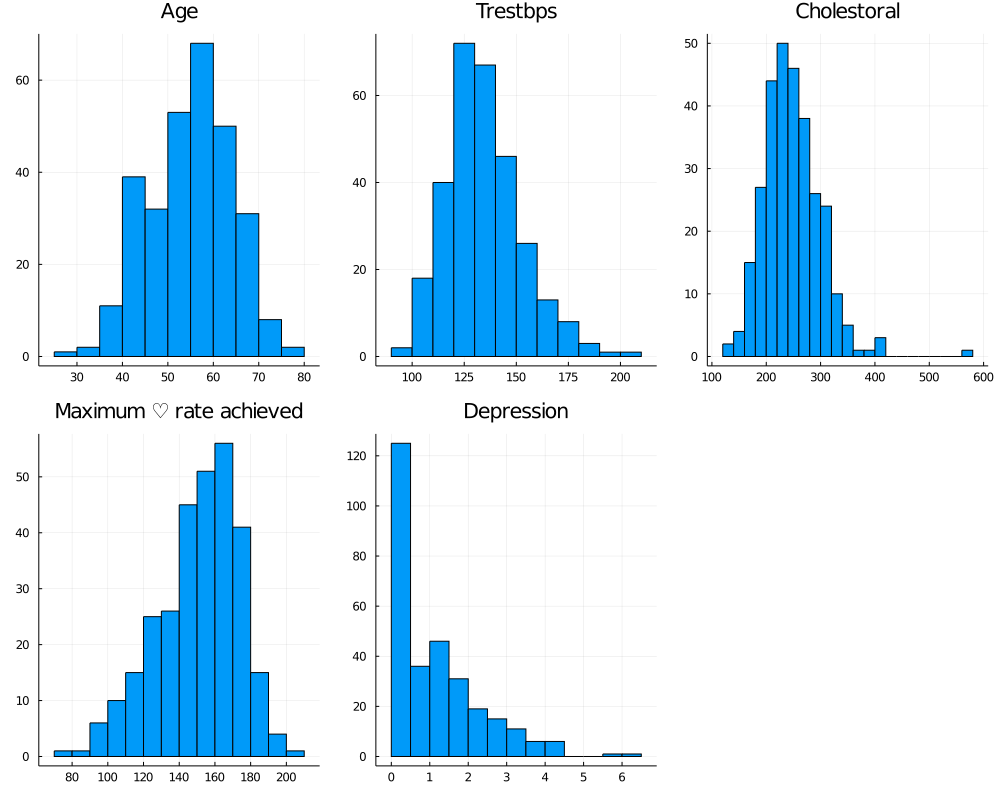

In [8]:
function plotReal(array::Array{<:Number, 1}, title::String)
     return histogram(array, title = title, label = false)
end

pAge = plotReal(cleveland.age, "Age")
pTrestbps = plotReal(cleveland.trestbps, "Trestbps")
pChol = plotReal(cleveland.chol, "Cholestoral")
pThalach = plotReal(cleveland.thalach, "Maximum ♡ rate achieved")
pOldpeak = plotReal(cleveland.oldpeak, "Depression")
    
plot(pAge, pTrestbps, pChol, pThalach, pOldpeak, layout=5, size=[1000, 800])


## Correlation Matrix
 Weaker correlations are in yellow and stronger in red.

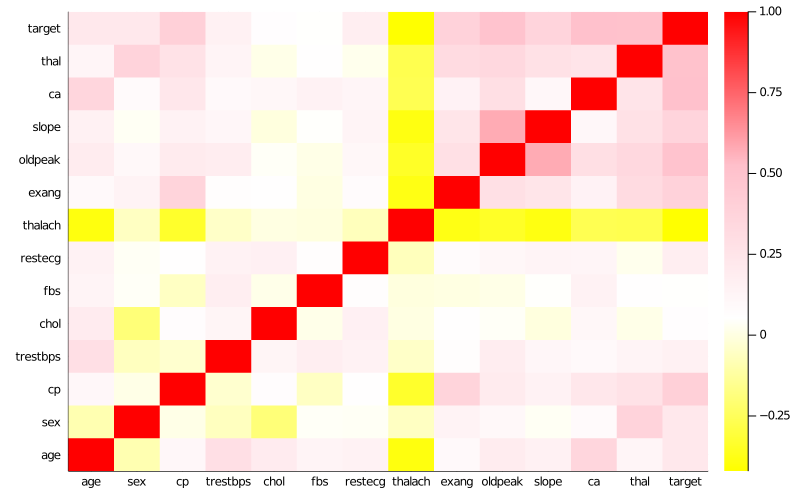

In [9]:
function PearsonCorrelation(df::DataFrame)
    corMatrix = zeros(14, 14)
    
    for i = 1:14
        for j = 1:14          
            corMatrix[i, j] = cor(df[!, i], df[!, j])
        end
    end
    
    corMatrix
end

x = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
heatmap(x, x, PearsonCorrelation(cleveland), c = cgrad([:yellow, :white, :pink, :red]), size=[800, 500])
